## Фаза 1. Неделя 1. Понедельник

### Распределения и их характеристики в `scipy`

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st

* [Документация scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)

### 1. Дискретное распределение

In [10]:
dice_distr = st.randint(1, 7) # Будем считать, что это сам кубик. Создаем экземпляр класса распределения

* `st.randint(1, 7)` - Создает равномерное распределение, что и нужно для нашего кубика
* В данном модуле `scipy.stats as st` можно найти любое другое необходимое распределение

##### 1.1 Взятие выборки из данного распределения

In [11]:
N = 10

sample = dice_distr.rvs(size=N) # Подбросили 10 раз
sample

array([2, 4, 6, 4, 2, 5, 5, 4, 6, 2])

##### 1.2 <b>PMF</b> (probability mass function). 


* По-русски: функция вероятности: $f(x)$
* Позволяет поулчить:  по значению -> вероятность данного значения
* Только для __дискретных__


$PMF_{\xi}(x) = P(\xi = x)$

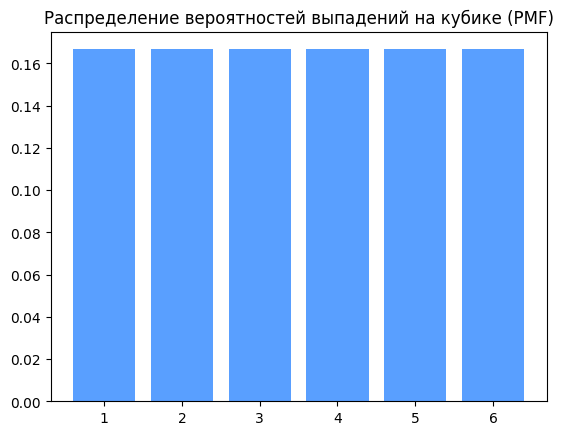

In [43]:
plt.bar([1, 2, 3, 4, 5, 6], dice_distr.pmf([1, 2, 3, 4, 5, 6]), color='#599FFF')
plt.title('Распределение вероятностей выпадений на кубике (PMF)');

In [13]:
print('Вероятность выпадения двойки -', dice_distr.pmf(2))
print('Вероятность выпадения семерки -', dice_distr.pmf(7))

Вероятность выпадения двойки - 0.16666666666666666
Вероятность выпадения семерки - 0.0


##### 1.3 __CDF__ (cummulative distribution function)

* По-русски: Функция распределения $F(x)$
* Позволяет получить: по значению -> вероятность быть меньше данного значения

$CDF_{\xi}(x) = P(\xi \leq x)$

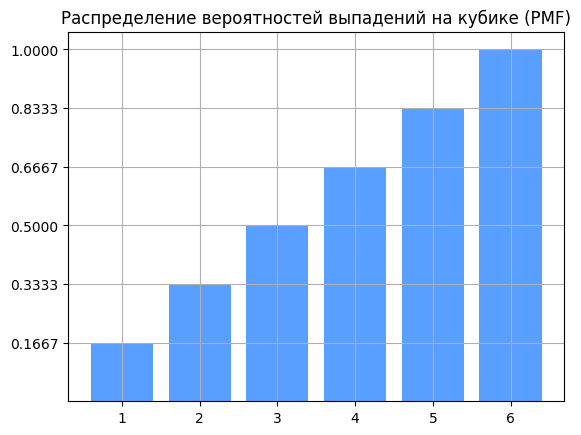

In [48]:
plt.bar([1, 2, 3, 4, 5, 6], dice_distr.cdf([1, 2, 3, 4, 5, 6]), color='#599FFF')
plt.title('Распределение вероятностей выпадений на кубике (PMF)')
plt.yticks(dice_distr.cdf([1, 2, 3, 4, 5, 6]))
plt.grid();

In [15]:
print('Вероятность получить меньше или равно двойки -', dice_distr.cdf(2))
print('Вероятность получить меньше или равно семерки -', dice_distr.cdf(7))

Вероятность получить меньше или равно двойки - 0.3333333333333333
Вероятность получить меньше или равно семерки - 1.0


##### 1.4 __PPF__ (percent point function)

* По-русски квантиль уровня гамма: $F_{\alpha}^{-1}(x)$
* Например: квантиль уровня 0.6 вернет такое значение, что 60% значений распределения будут $\leq$, чем данное.
* Квантиль уровня 0.5 - медиана

In [16]:
alpha = 0.5

dice_distr.ppf(alpha)

3.0

* 3 является кватилем уровня 0.5, так 50% значений меньше или равны 3, а 50 больше

##### 1.5 Мат.ожидание(среднее) и Выборочное среднее

$\mathbb {E}(x) = \sum^{6}_{i=1} x_i \cdot p_i$ - мат.ожидание

In [17]:
dice_distr.mean() # Мат.ожилаине кубика 

3.5

$\overline{X} = \dfrac{1}{n}\sum_{i=1}^{n}x_i$ - выборочное среднее

In [18]:
sample.mean() # Выборочное среднее после 10 подбрасываний

4.0

##### 1.6 Дисперсия и Выборочная дисперсия 

$\sigma^2$ = $\mathbb D[X]=\mathbb {E} [X^{2}]-\left(\mathbb {E} [X]\right)^{2}$

In [19]:
dice_distr.var() # Дисперсия

2.9166666666666665

${\overline {S}}^{2}={\dfrac {1}{n}}\sum \limits _{i=1}^{n}(X_{i}-{\overline {X}})^{2}$

In [20]:
sample.var() # Выборочная дисперсия

2.2

##### 1.7 Стандартное отклонение

In [21]:
dice_distr.var() # Стандартное отклонение

2.9166666666666665

In [22]:
sample.var() # Выборочное стандартное отклоенине

2.2

### 2. Непрерывное распределение

In [23]:
mu = 175
sigma = 8

height_distribution = st.norm(mu, sigma)

##### 2.1 Взятие выборки из данного распределения

In [27]:
N = 100

sample = height_distribution.rvs(size=N) # Измеряли 10 случайных людей
sample

array([172.95014014, 173.44999455, 177.66532762, 171.31613955,
       162.3764183 , 184.21856612, 172.70402604, 174.15168643,
       169.3615086 , 184.33711071, 178.02339608, 172.74284458,
       181.33148036, 178.62174298, 178.45590008, 175.1767792 ,
       175.46618785, 165.21429272, 176.95499243, 173.37780773,
       171.75694539, 171.88451733, 178.5894792 , 176.66810903,
       195.66494319, 185.6597715 , 188.68752021, 164.7370034 ,
       167.08734675, 163.08307037, 183.40881324, 164.08359807,
       166.52796318, 159.86603812, 171.23282066, 183.56406254,
       162.94154329, 179.9796254 , 176.42998079, 152.89788392,
       173.41052477, 171.31954216, 183.06968529, 181.33271708,
       167.53009527, 171.30191808, 179.94678162, 163.62204538,
       174.86738576, 162.63556311, 178.63148694, 174.8800451 ,
       174.69382502, 169.97894262, 194.17411471, 175.74575735,
       165.27073958, 175.23444798, 184.43416699, 175.1135749 ,
       173.48364396, 160.7841345 , 171.43151077, 178.89

##### 2.2 <b>PDF</b> (probability density function). 


* По-русски: функция плотности вероятности: $f(x)$
* Позволяет поулчить:  по значению -> вероятность данного значения
* Только для __дискретных__


$PMF_{\xi}(x) = P(\xi = x)$

In [28]:
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000) # генерация оси x, для поточечного построения

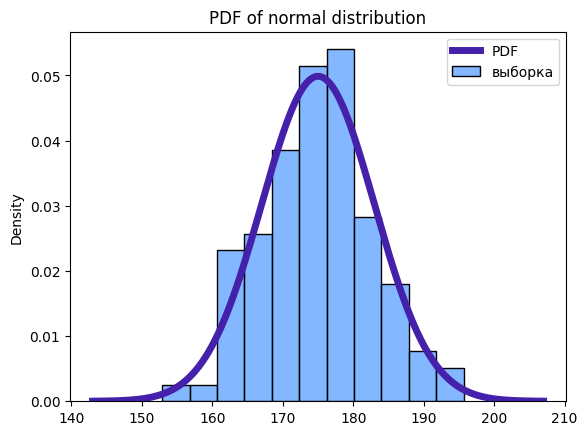

In [29]:
fig, ax = plt.subplots()

sns.histplot(sample, ax=ax, color='#599FFF', stat='density', label = 'выборка')
ax.plot(x, height_distribution.pdf(x), color='#4520ab', linewidth=5, label = 'PDF')
ax.set_title('PDF of normal distribution')
ax.legend();

In [286]:
print('Процент людкй с ростом ровно 175 -', height_distribution.pdf(175))
print('Процент людкй с ростом ровно 183 -', height_distribution.pdf(183))

Процент людкй с ростом ровно 175 - 0.04986778505017909
Процент людкй с ростом ровно 183 - 0.03024634056489292


##### 2.3 __CDF__ (cummulative distribution function)  

* По-русски: Функция распределения $F(x)$
* Позволяет получить: по значению -> вероятность быть меньше данного значения

$CDF_{\xi}(x) = P(\xi \leq x)$

In [31]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = height_distribution.pdf(x)

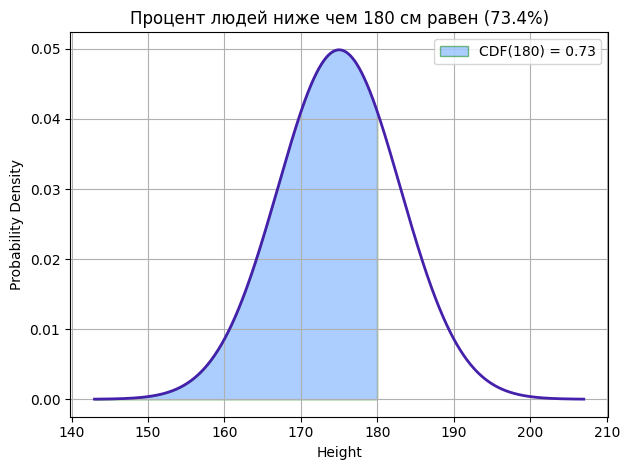

In [34]:
def plot_cdf_below_value(distr, value):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = distr.pdf(x)

    area = distr.cdf(value)
    plt.plot(x, y, '#4520ab', linewidth=2)
    
    plt.fill_between(x, y, where=(x <= value), color='#599FFF', alpha=0.5, label=f'CDF({value}) = {np.round(area, 2)}', edgecolor='g')

    plt.xlabel('Height')
    plt.ylabel('Probability Density')
    plt.title('Процент людей ниже чем {} см равен ({}%)'.format(value, round(area*100, 2)))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

value = 180 
plot_cdf_below_value(height_distribution, 180)

In [289]:
print('Процент людей меньше 162 -', height_distribution.cdf(162))

Процент людей меньше 162 - 0.05208127941521953


* Каков вероятность встретить случайного человека больше, чем 185см ?
* Каков процент людей от 170 до 180?

##### 2.4 __PPF__ (percent point function)


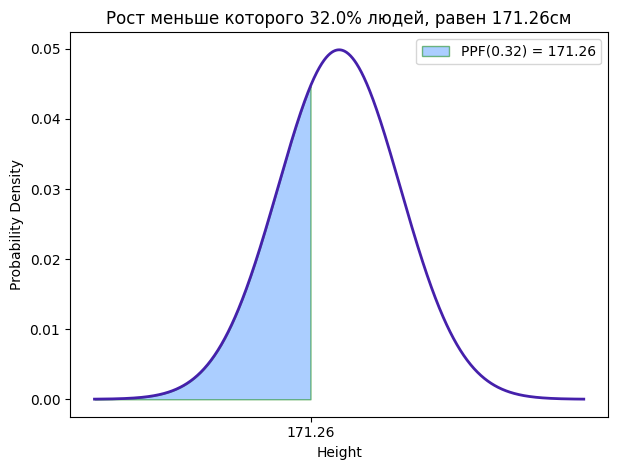

In [50]:
def plot_cdf_below_value(distr, alpha):
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = distr.pdf(x)

    quantile_value = distr.ppf(alpha)
    plt.plot(x, y, '#4520ab', linewidth=2)
    
    plt.fill_between(x, y, where=(x <= quantile_value), color='#599FFF', alpha=0.5, label=f'PPF({alpha}) = {np.round(quantile_value, 2)}', edgecolor='g')
    # plt.fill_between(x, y, where=(x >= quantile_value), color='skyblue', alpha=0.2)

    plt.xlabel('Height')
    plt.ylabel('Probability Density')
    plt.title('Рост меньше которого {}% людей, равен {}см'.format(100 * alpha, round(quantile_value, 2)))
    plt.tight_layout()
    plt.legend()
    plt.xticks([quantile_value])
    plt.show()

plot_cdf_below_value(height_distribution, 0.32)

In [51]:
alpha = 0.5
height_distribution.ppf(alpha)

175.0

#### 3. Центральная предельная теорема

$\overline{X} = \dfrac{1}{n}\sum_{i = 1} ^ {n} x_i$ - Выборочное среднее  

По центральной предельной теореме, выборочное среднее имеет нормальное распределение со следующими параметрами  


$\overline{X} \sim \mathbb{N} (\mu, \dfrac{\sigma}{\sqrt{n}})$.

[Симуляции Центральной предельной теоремы](https://www.youtube.com/watch?v=7S7j75d3GM4)

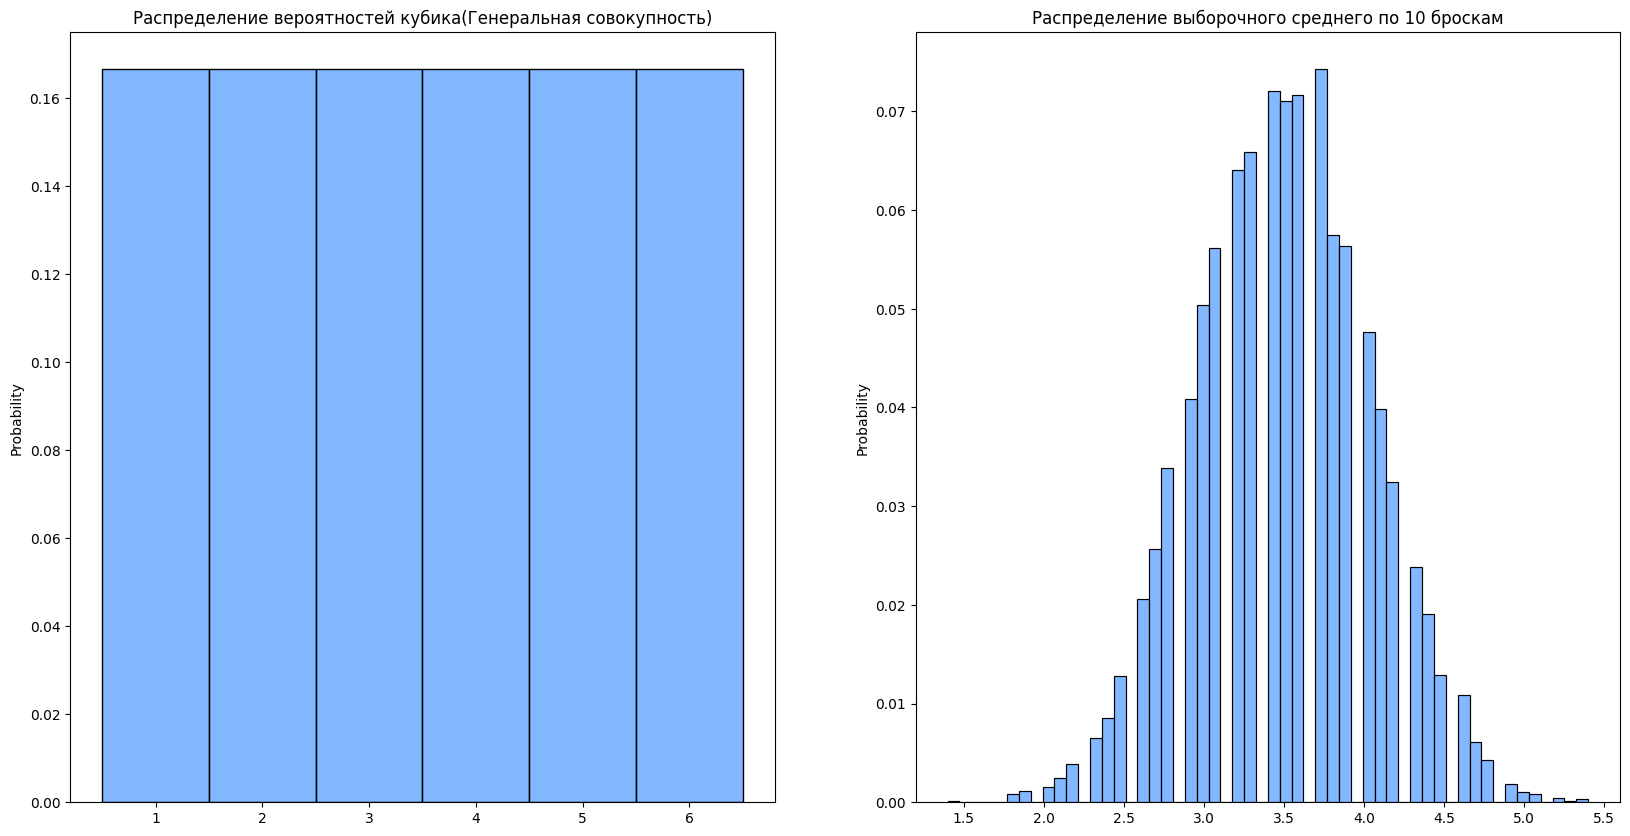

In [52]:
dice = np.array([1, 2, 3, 4, 5, 6]) # Возможные очки на кубике, все равновероятны, назовем это нашей ГС

N = 10000 # 1000 раз проведем эксперимент
M = 10 # В каждом эксперименте будем подбрасывать 10 раз кубик

sample_means = []

for i in range(N):
    sample_dice = np.random.choice(dice, size=M, replace=True) # Подкидываем кубик 10 раз
    sample_means.append(sample_dice.mean())
    
sample_means = np.array(sample_means)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(dice, ax=ax[0], bins = np.arange(0.5, 7.5, 1), stat='probability', color='#599FFF')
sns.histplot(sample_means, ax=ax[1], stat='probability', color='#599FFF')
ax[0].set_title('Распределение вероятностей кубика(Генеральная совокупность)')
ax[1].set_title(f'Распределение выборочного среднего по {M} броскам')
plt.show()

#### 4. Закон больших чисел  

* Чем больше размер выборки $n$, тем выборочное среднее стремится все ближе к мат.ожиданию(среднее по ГС)

In [53]:
n = 1000

sample = np.array([])
means = np.array([])

for i in range(n):
    sample = np.append(sample, height_distribution.rvs(1))
    means = np.append(means, sample.mean())

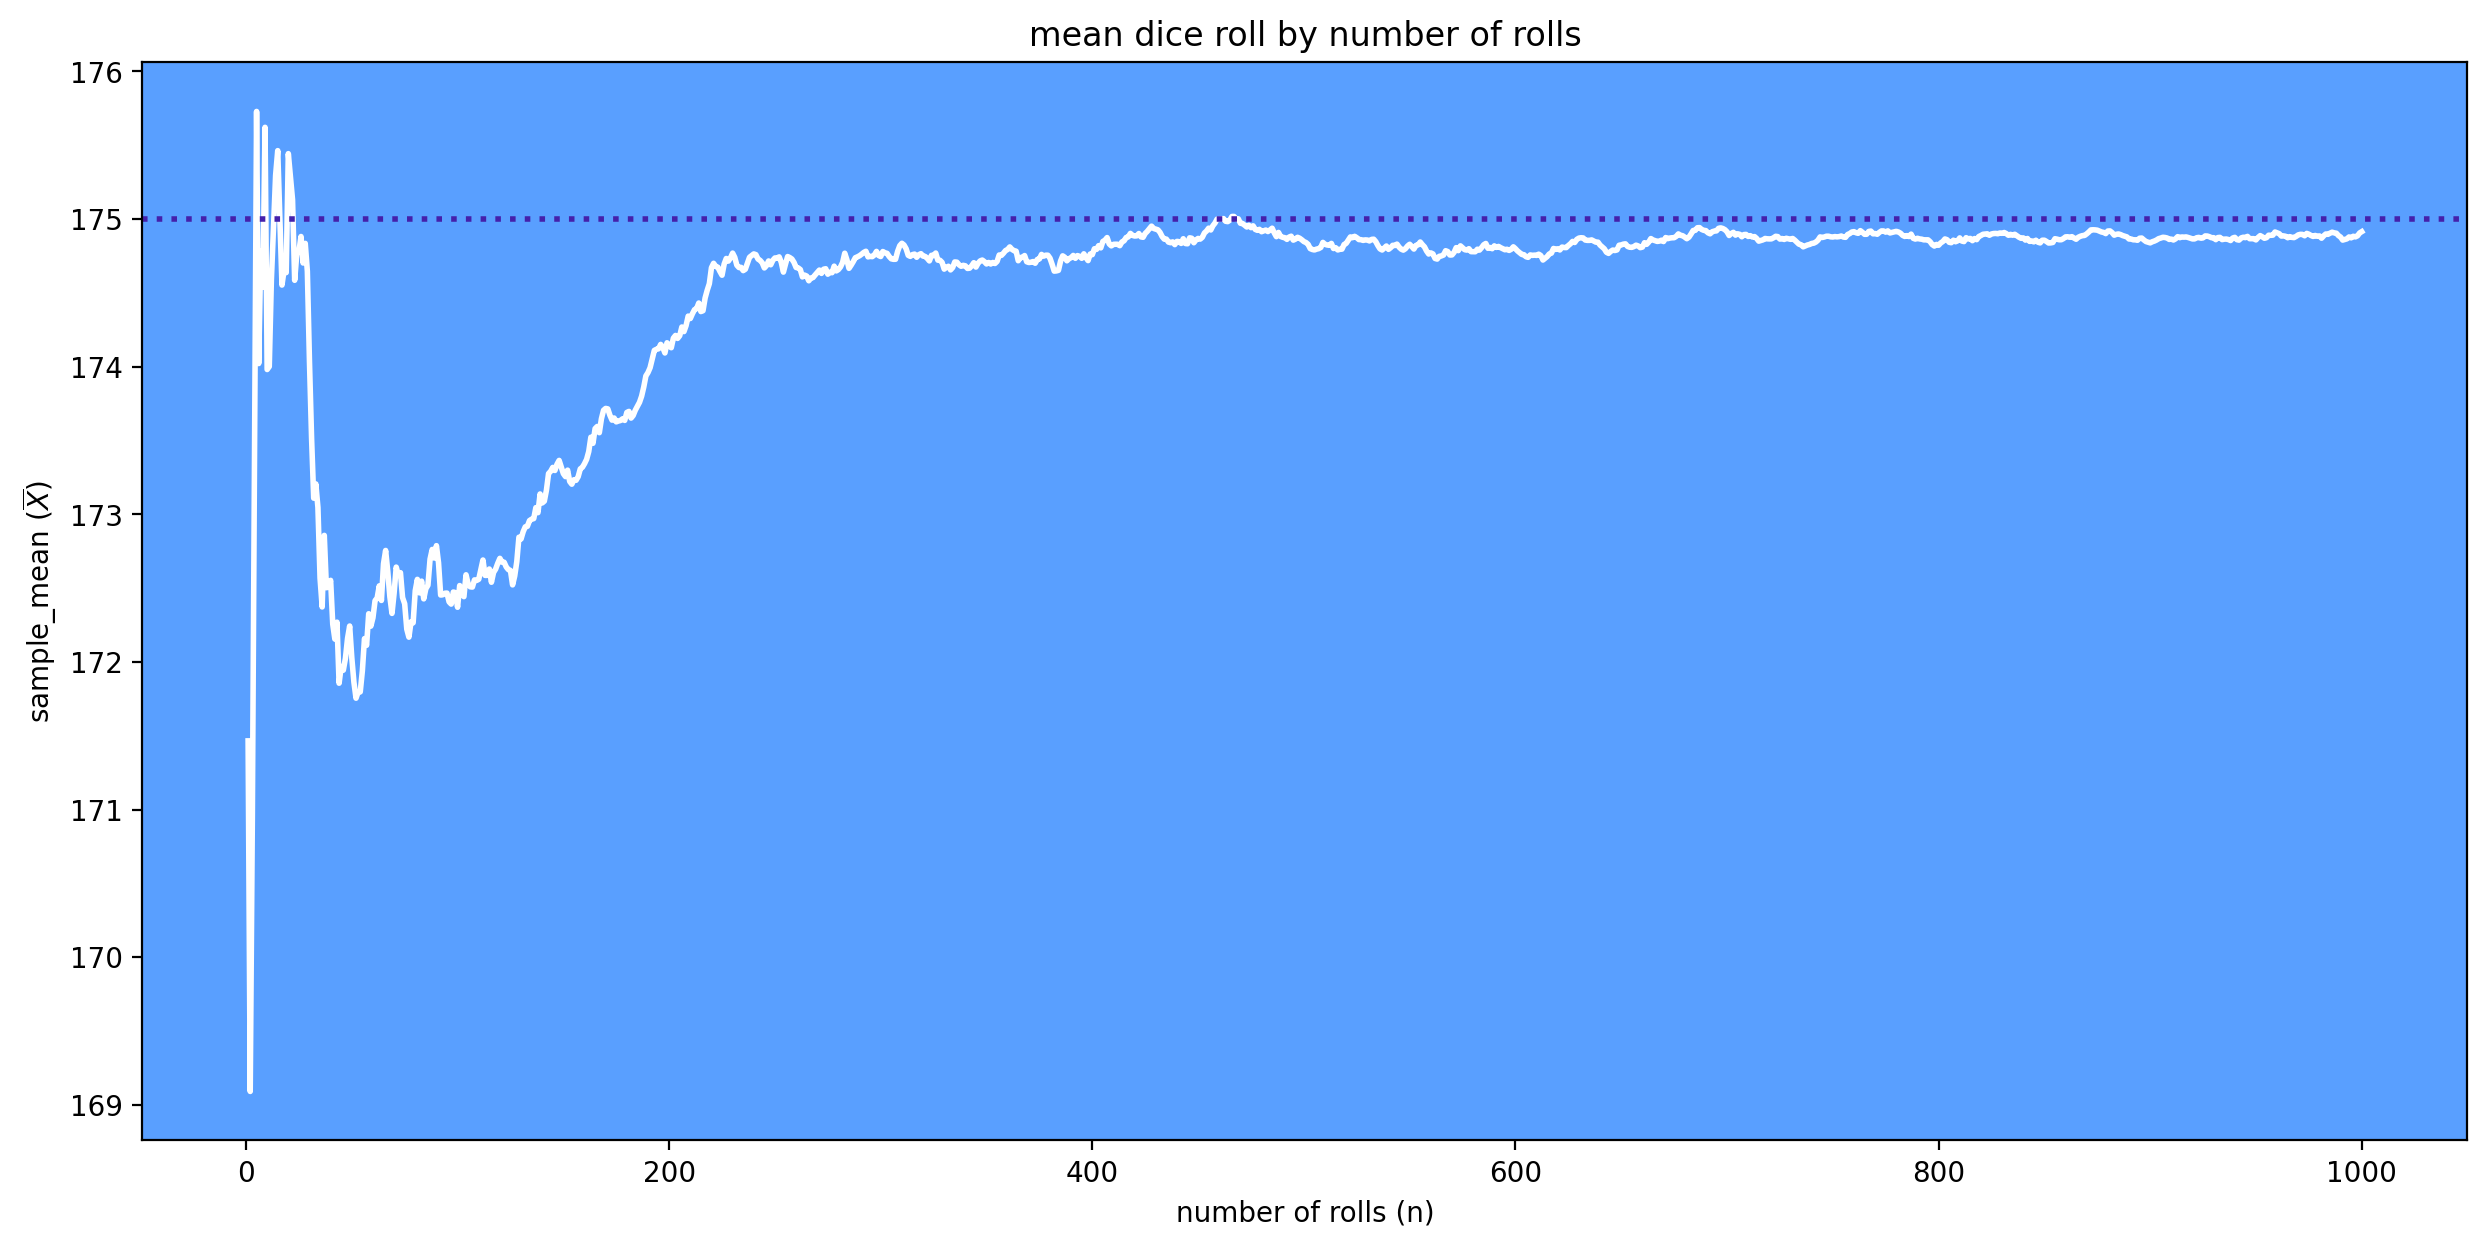

In [61]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_facecolor('#599FFF')
plt.plot(np.arange(1, n+1), means, color='w', linewidth=2)
plt.axhline(mu, linestyle = ':', linewidth=2, color='#4520ab')
plt.xlabel('number of observations (n)')
plt.ylabel(r'sample_mean ($\overline{X}$)')
plt.title('Dependence of the sample mean on the number of observations');